#### Link of the Pycaret docs : https://pycaret.readthedocs.io/en/latest/api/time_series.html

In [1]:
#importing necessary packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import numpy as np 
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit
from pycaret.time_series import TSForecastingExperiment
import pmdarima as pm


In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('dbgraos_mt.xls', sheet_name='Planilha1')
print(df.head(10))

   date  producao  disponibilidade   tipo    liter
0  2017  31271827          9408526   soja   301961
1  2018  32650425          9506669   soja   545110
2  2019  32310076          9609533   soja  1029190
3  2020  35403507          9985265   soja  1997490
4  2021  36051673         10464882   soja  2860097
5  2022  40872194         11475682   soja  3209840
6  2023  45316887         12122515   soja  4419242
7  2017  30771279          4789148  milho   301961
8  2018  28263869          4731901  milho   545110
9  2019  32450218          4876379  milho  1029190


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             14 non-null     int64 
 1   producao         14 non-null     int64 
 2   disponibilidade  14 non-null     int64 
 3   tipo             14 non-null     object
 4   liter            14 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 688.0+ bytes


### Avaliando a produção de soja

<Axes: >

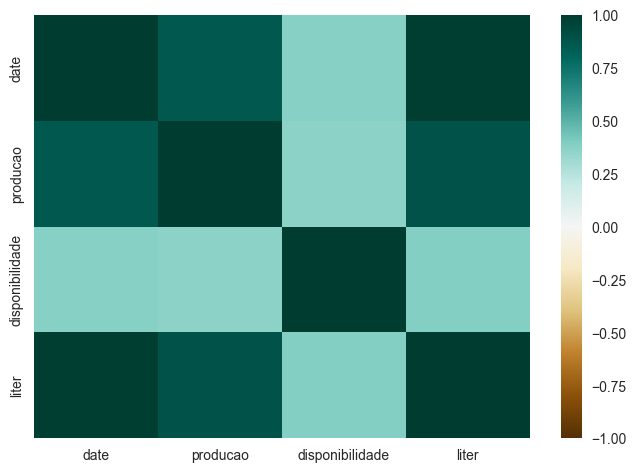

In [4]:
#temp_df = prod_fase2[num_list]
sns.heatmap(df.corr(),
           vmin = -1, vmax = 1, cmap = 'BrBG')

In [5]:
df.drop(['disponibilidade'], axis = 1,inplace=True)
df = df[df['tipo']=='soja']
df.head(10)


,date,producao,tipo,liter
0,2017,31271827,soja,301961
1,2018,32650425,soja,545110
2,2019,32310076,soja,1029190
3,2020,35403507,soja,1997490
4,2021,36051673,soja,2860097
5,2022,40872194,soja,3209840
6,2023,45316887,soja,4419242


In [6]:
df.drop(['tipo', 'liter'], axis = 1,inplace=True)

In [7]:
df.set_index('date',inplace=True)

In [8]:
df=df.sort_index(axis=0)
print(df.head(10))

      producao
date          
2017  31271827
2018  32650425
2019  32310076
2020  35403507
2021  36051673
2022  40872194
2023  45316887


fh: Optional[int or list or np.array], default = 1

The forecast horizon to be used for forecasting. Default is set to 1 i.e. forecast one point ahead. When integer is passed it means N continuous points in the future without any gap. If you want to forecast values with gaps, you must pass an array e.g. np.arange([13, 25]) will skip the first 12 future points and forecast from the 13th point till the 24th point ahead (note in numpy right value is inclusive and left is exclusive).

In [9]:
exp = TSForecastingExperiment()
exp.setup(data=df, fh=1, session_id=42, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,42
1,Target,producao
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(7, 1)"
5,Transformed data shape,"(7, 1)"
6,Transformed train set shape,"(6, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [10]:
exp.plot_model(plot="ts",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

## Checking Train-Test Split

In [11]:
exp.plot_model(plot="train_test_split",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

## Comparing Models

The most basic assumption of time series forecasting is that past patterns continue into the future. 
Based on this assumption, in the short-term future forecast, since the environment in which the data is generated is similar to the present, 
the uncertainty is small and the forecast can be well-predicted. However, as we move towards long-term future forecasting, the possibility of the environment in which data is generated is likely to change, and unpredictable situations occur, and as errors continue to accumulate, uncertainty about the forecast data is bound to increase.

We compare the performance of various models and try to select the 4 models with the best performance.

In [12]:
top4 = exp.compare_models(n_select = 4)

## Lag and Difference
Time series data modeling is to find patterns in the process of normalizing nonstationary time series data. 
Lag and difference are the most representative methods used in the process of making a stationary time series into a stationary time series.

## Difference Plot Using Order

In [13]:
exp.plot_model(plot="diff", 
               data_kwargs={"order_list": [1, 2], "acf": True, "pacf": True},
               fig_kwargs = {"height":700,"width":1000,"template": "simple_white","hoverinfo":"skip","big_data_threshold":10})

### XGBOOST

In [14]:
xgboost = exp.create_model('xgboost_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = xgboost, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


## DT_CDS_DT

In [15]:
dt_cds_dt  = exp.create_model('dt_cds_dt')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = dt_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019.0000,1.9952,1.7079,1714833.0000,1714833.0000,0.0484,0.0496
1,2020.0000,0.8295,0.6771,1330658.8000,1330658.8000,0.0369,0.0376
2,2021.0000,2.4149,1.9029,3296659.4000,3296659.4000,0.0807,0.0840
Mean,nan,1.7465,1.4293,2114050.4000,2114050.4000,0.0553,0.0571
SD,nan,0.6707,0.5378,850811.5691,850811.5691,0.0185,0.0197


Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


## et_cds_dt

In [16]:

et_cds_dt = exp.create_model('et_cds_dt')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = et_cds_dt, 
               plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


## br_cds_dt   

In [17]:

br_cds_dt = exp.create_model('br_cds_dt')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = br_cds_dt, 
               plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


## ada_cds_dt

In [18]:

ada_cds_dt = exp.create_model('ada_cds_dt')
exp.plot_model(plot = 'decomp', 
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ada_cds_dt, 
               plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019.0000,1.9952,1.7079,1714833.0000,1714833.0000,0.0484,0.0496
1,2020.0000,0.1341,0.1095,215159.3000,215159.3000,0.0060,0.0060
2,2021.0000,2.4149,1.9029,3296659.4000,3296659.4000,0.0807,0.0840
Mean,nan,1.5147,1.2401,1742217.2333,1742217.2333,0.0450,0.0465
SD,nan,0.9912,0.8034,1258166.1625,1258166.1625,0.0306,0.0320


Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


## ALL GRAPHS

In [19]:
exp.plot_model(estimator = xgboost, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = dt_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = et_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = br_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ada_cds_dt, plot = 'forecast',
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
               

## Avaliando a produção do milho 

In [20]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('dbgraos_mt.xls', sheet_name='Planilha1')
print(df.head(10))

   date  producao  disponibilidade   tipo    liter
0  2017  31271827          9408526   soja   301961
1  2018  32650425          9506669   soja   545110
2  2019  32310076          9609533   soja  1029190
3  2020  35403507          9985265   soja  1997490
4  2021  36051673         10464882   soja  2860097
5  2022  40872194         11475682   soja  3209840
6  2023  45316887         12122515   soja  4419242
7  2017  30771279          4789148  milho   301961
8  2018  28263869          4731901  milho   545110
9  2019  32450218          4876379  milho  1029190


In [21]:
df.drop(['disponibilidade'], axis = 1,inplace=True)
df = df[df['tipo']=='milho']
df.head(10)

,date,producao,tipo,liter
7,2017,30771279,milho,301961
8,2018,28263869,milho,545110
9,2019,32450218,milho,1029190
10,2020,35450470,milho,1997490
11,2021,32564859,milho,2860097
12,2022,43838637,milho,3209840
13,2023,52504793,milho,4419242


In [22]:
df.drop(['tipo', 'liter'], axis = 1,inplace=True)

In [23]:
df.set_index('date',inplace=True)

In [24]:
df=df.sort_index(axis=0)
print(df.head(10))

      producao
date          
2017  30771279
2018  28263869
2019  32450218
2020  35450470
2021  32564859
2022  43838637
2023  52504793


In [25]:
exp = TSForecastingExperiment()
exp.setup(data=df, fh=1, session_id=15, fig_kwargs = {"template": "simple_white","hoverinfo":"none"})

,Description,Value
0,session_id,15
1,Target,producao
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(7, 1)"
5,Transformed data shape,"(7, 1)"
6,Transformed train set shape,"(6, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [26]:
exp.plot_model(plot="ts",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})


In [27]:
exp.plot_model(plot="train_test_split",fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})


In [28]:
top4 = exp.compare_models(n_select = 4)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:13:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,1.5333,1.4973,4943379.7667,4943379.7667,0.1257,0.1363,6.2133
theta,Theta Forecaster,1.6263,1.5906,5199643.7902,5199643.7902,0.1313,0.1408,0.1033
polytrend,Polynomial Trend Forecaster,1.6334,1.5969,5235953.0667,5235953.0667,0.1351,0.1419,0.0400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.6652,1.6262,5369609.7151,5369609.7151,0.1389,0.1487,0.2167
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.6652,1.6262,5369609.7151,5369609.7151,0.1389,0.1487,0.2533
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.6652,1.6262,5369609.7151,5369609.7151,0.1389,0.1487,0.1500
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.6652,1.6262,5369609.7151,5369609.7151,0.1389,0.1487,0.1333
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.6652,1.6262,5369609.7151,5369609.7151,0.1389,0.1487,0.0833
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.6652,1.6262,5369609.7151,5369609.7151,0.1389,0.1487,0.0700
naive,Naive Forecaster,1.7914,1.7524,5719880.3333,5719880.3333,0.1435,0.1561,0.6900


Processing:   0%|          | 0/112 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Lag and Difference
Time series data modeling is to find patterns in the process of normalizing nonstationary time series data.
 
Lag and difference are the most representative methods used in the process of making a stationary time series into a stationary time series.

In [ ]:
exp.plot_model(plot="diff", 
               data_kwargs={"order_list": [1, 2], "acf": True, "pacf": True},
               fig_kwargs = {"height":700,"width":1000,"template": "simple_white","hoverinfo":"skip","big_data_threshold":10})


####  xgboost_cds_dt Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending

In [ ]:
xgboost = exp.create_model('xgboost_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = xgboost, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


#### gbr_cds_dt   Gradient Boosting w/ Cond. Deseasonalize & Detrending

In [ ]:
gbr_cds_dt = exp.create_model('gbr_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = gbr_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

RuntimeError: This function/method requires the users to run setup() first.
More info: https://pycaret.gitbook.io/docs/get-started/quickstart

#### rf_cds_dt   Random Forest w/ Cond. Deseasonalize & Detrending

In [ ]:
rf_cds_dt = exp.create_model('rf_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = rf_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019.0000,1.4156,1.3731,4737879.7150,4737879.7150,0.1336,0.1432
1,2020.0000,0.6715,0.6561,2169838.5900,2169838.5900,0.0666,0.0645
2,2021.0000,2.5050,2.4565,7878018.0300,7878018.0300,0.1797,0.1974
Mean,nan,1.5307,1.4952,4928578.7783,4928578.7783,0.1267,0.1350
SD,nan,0.7529,0.7401,2334252.5898,2334252.5898,0.0464,0.0546


Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.



## ada_cds_dt   AdaBoost w/ Cond. Deseasonalize & Detrendin


In [ ]:
ada_cds_dt = exp.create_model('ada_cds_dt')
exp.plot_model(plot = 'decomp',
               data_kwargs = {'type' : 'multiplicative'},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ada_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2019.0000,0.6456,0.6262,2160782.5000,2160782.5000,0.0610,0.0629
1,2020.0000,0.3609,0.3526,1166186.6000,1166186.6000,0.0358,0.0352
2,2021.0000,2.5935,2.5432,8156290.7000,8156290.7000,0.1861,0.2051
Mean,nan,1.2000,1.1740,3827753.2667,3827753.2667,0.0943,0.1011
SD,nan,0.9922,0.9746,3087553.7766,3087553.7766,0.0657,0.0745


Decomposition is currently not supported for pandas dataframes without a PeriodIndex or DatetimeIndex. Please specify a PeriodIndex or DatetimeIndex in setup() before plotting decomposition plots.


### ALL GRAPHS

In [ ]:
exp.plot_model(estimator = xgboost, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = gbr_cds_dt , plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = rf_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})
exp.plot_model(estimator = ada_cds_dt, plot = 'forecast', 
               data_kwargs = {'fh' : 8},
               fig_kwargs = {"height":500,"width":1000,"template": "simple_white","hoverinfo":"none","big_data_threshold":10})